In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
import sys
from pathlib import Path
sys.path.append('..')

import pickle
import json

# Script params

In [2]:
max_len = 100
embedding_dim = 32

# Load train and test data

In [3]:
from keras.utils import pad_sequences

2023-08-10 23:23:45.392792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_test_df.pkl', 'rb') as f:
    test_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/token2index.json', 'r') as f:
    token2index = json.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/index2token.json', 'r') as f:
    index2token = json.load(f)

In [5]:
max_index = max(list(token2index.values())) + 1

In [6]:
x_train = pad_sequences(train_df.token_indexes.values, maxlen = max_len)
y_train = train_df.labels.values
x_test = pad_sequences(test_df.token_indexes.values, maxlen = max_len)
y_test = test_df.labels.values

In [7]:
x_train.shape, y_train.shape

((25000, 100), (25000,))

In [8]:
x_test.shape, y_test.shape

((25000, 100), (25000,))

# Training simple dnn with embedding layer

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, BatchNormalization

In [14]:
model = Sequential()
model.add(Embedding(max_index, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           1109888   
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 6400)             25600     
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                102416    
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,237,921
Trainable params: 1,225,121
Non-trainable params: 12,800
_______________________________________

In [17]:
fit_history = model.fit(x_train,
                        y_train,
                        epochs=15,
                        batch_size=64,
                        validation_data=(x_test, y_test)
                       )

Epoch 1/15
391/391 [==============================] - 7s 17ms/step - loss: 0.4458 - acc: 0.7870 - val_loss: 0.4954 - val_acc: 0.8382
Epoch 2/15
391/391 [==============================] - 5s 12ms/step - loss: 0.1205 - acc: 0.9557 - val_loss: 0.4501 - val_acc: 0.8360
Epoch 3/15
391/391 [==============================] - 5s 12ms/step - loss: 0.0318 - acc: 0.9895 - val_loss: 0.6788 - val_acc: 0.8288
Epoch 4/15
391/391 [==============================] - 5s 12ms/step - loss: 0.0158 - acc: 0.9947 - val_loss: 0.7890 - val_acc: 0.8338
Epoch 5/15
391/391 [==============================] - 6s 14ms/step - loss: 0.0110 - acc: 0.9961 - val_loss: 0.8934 - val_acc: 0.8351
Epoch 6/15
391/391 [==============================] - 5s 12ms/step - loss: 0.0121 - acc: 0.9957 - val_loss: 0.9490 - val_acc: 0.8320
Epoch 7/15
391/391 [==============================] - 5s 13ms/step - loss: 0.0107 - acc: 0.9968 - val_loss: 1.0530 - val_acc: 0.8296
Epoch 8/15
391/391 [==============================] - 6s 14ms/step - 

In [174]:
from kst.plots.BasePlots import BasePlots, ScatterPlot
import pandas as pd
from plotnine import aes, geom_point, geom_line

In [175]:
bs = BasePlots(data_set=pd.DataFrame.from_dict({'x':[1,2,3,4],'y':[1,2,3,4]}),
               main_title='test',
               x_label='x',
               y_label='y',
               legend_title='l'
              )

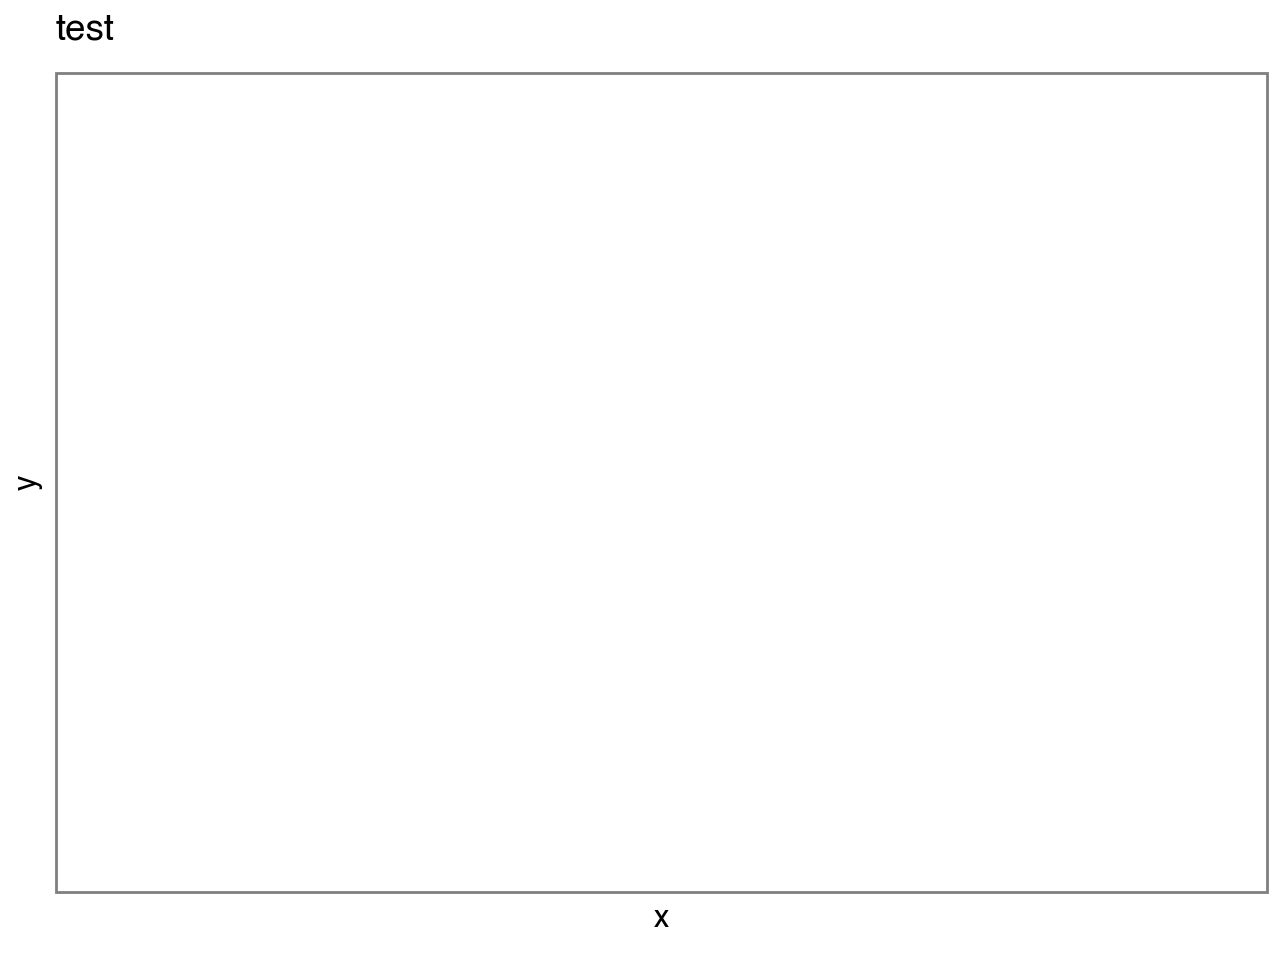

<Figure Size: (640 x 480)>

In [176]:
bs.plot

In [177]:
sc = ScatterPlot(data_set=pd.DataFrame.from_dict({'x':[1,2,3,4],'y':[1,2,3,4], 'z':[1,1,2,2]}),
                 aes = {'x':'x', 'y':'y'},
                 points_features={'colour':'red'},
                 main_title='test',
                 x_label='x',
                 y_label='y',
                 legend_title='l',
                 line = geom_line(color = 'red')
                 
              )

In [178]:
sc.add_gg_object(geom_line(pd.DataFrame.from_dict({'x':[1,2,3,4],'y':[2,4,6,8], 'z':[1,1,2,2]}),
                           aes(x = 'x', y = 'y'),color = 'blue') 
                 )

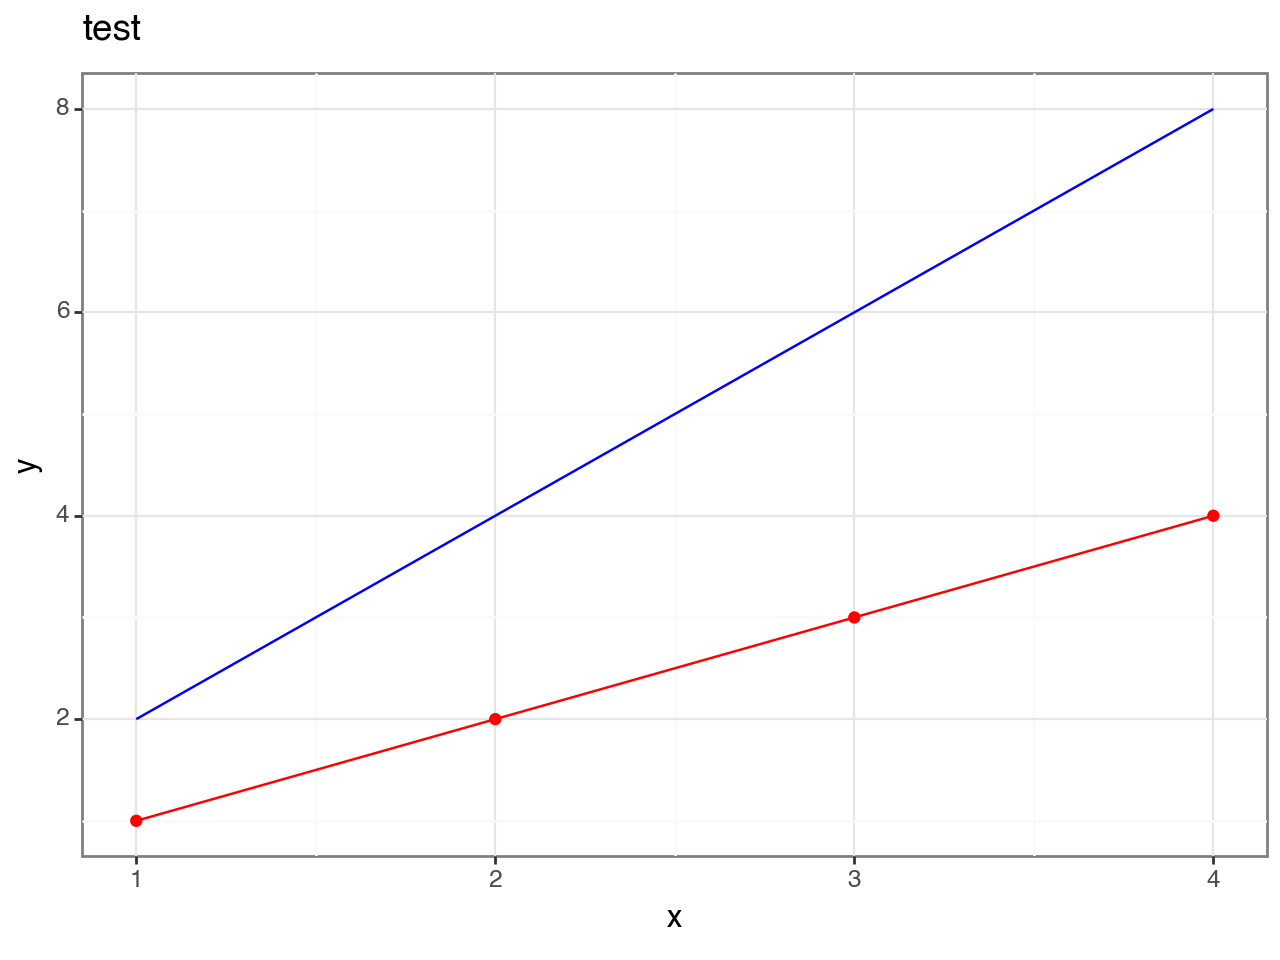

<Figure Size: (640 x 480)>

In [179]:
sc.plot